In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
from google.colab import files
up = files.upload()

Saving pocm.csv to pocm.csv


In [147]:
# fetched the only column needed for time series
data = pd.read_csv("pocm.csv", parse_dates=True)
data.drop("Unnamed: 0", axis=1, inplace=True)
# converting the date column to datatime format
data.columns = ["Date", "Quantity"]
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data.head()

,Quantity
Date,
2018-12-04,1
2018-12-04,1
2018-12-05,5
2018-12-05,10
2018-12-05,20


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160577 entries, 2018-12-04 to 2020-05-15
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Quantity  160577 non-null  int64
dtypes: int64(1)
memory usage: 2.5 MB


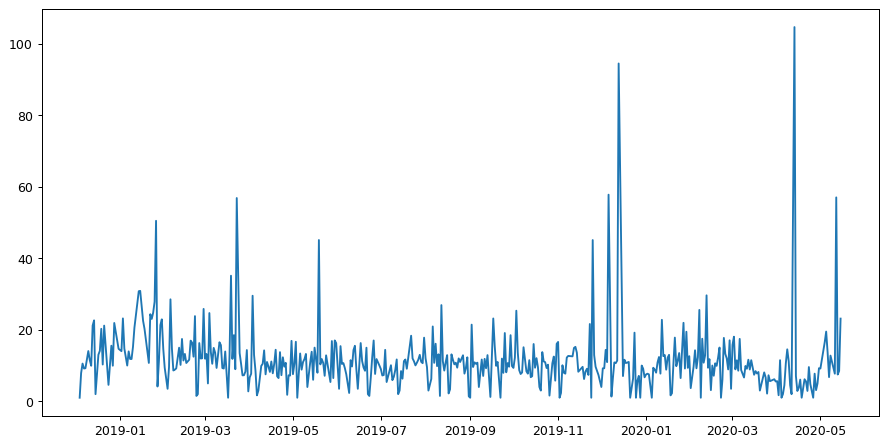

In [149]:
data = data.resample("D").mean().dropna()
plt.figure(figsize=(12,6),dpi=90)
plt.plot(data)
plt.show()

In [150]:
train1 = np.log(data[:"2020-05-01"])
train2 = np.log(data[:"2020-05-01"])
train3 = np.log(data[:"2020-05-01"])
test1 = np.log(data["2020-05-01":])
test2 = np.log(data["2020-05-01":])
test3 = np.log(data["2020-05-01":])

In [151]:
test1

,Quantity
Date,
2020-05-01,2.215352
2020-05-04,2.805575
2020-05-05,2.970984
2020-05-06,2.615324
2020-05-07,1.912574
2020-05-08,2.548219
2020-05-11,2.044062
2020-05-12,4.043943
2020-05-13,2.013897


In [152]:
np.random.seed(7)

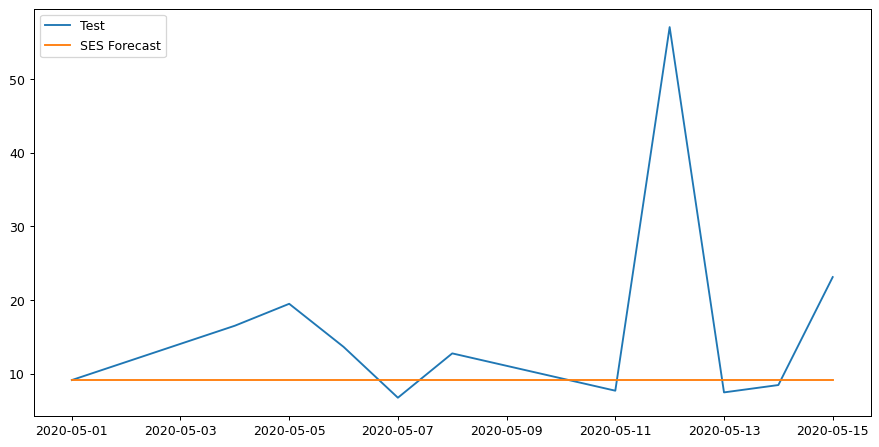

In [153]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = SimpleExpSmoothing(np.asarray(train1)).fit(smoothing_level=0.9, optimized=False)
test1["SES"] = fit1.forecast(len(test1))

#plotting the SES forecast
test1["Quantity"] = np.exp(test1["Quantity"])
test1["SES"] = np.exp(test1["SES"])
plt.figure(figsize=(12,6), dpi=90)
# plt.plot(daily.dropna(), label="Train")
plt.plot(test1["Quantity"], label="Test")

plt.plot(test1["SES"], label="SES Forecast")
plt.legend(loc="upper left")
plt.show()

In [154]:
test1

,Quantity,SES
Date,,
2020-05-01,9.164634,9.114054
2020-05-04,16.536585,9.114054
2020-05-05,19.511111,9.114054
2020-05-06,13.671642,9.114054
2020-05-07,6.770492,9.114054
2020-05-08,12.784314,9.114054
2020-05-11,7.721910,9.114054
2020-05-12,57.050847,9.114054
2020-05-13,7.492462,9.114054


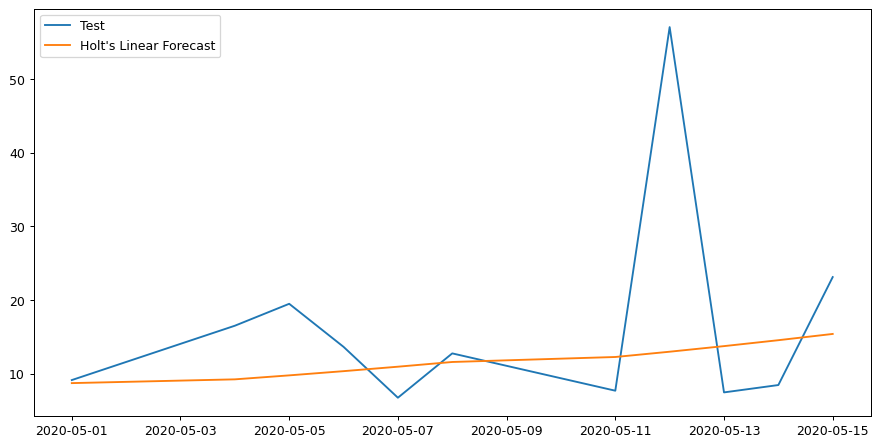

In [155]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit2 = Holt(np.asarray(train2)).fit(smoothing_level=0.6, smoothing_slope=0.1)
test2["Holt's Linear"] = fit2.forecast(len(test2))

#plotting the Holt's linear
test2["Holt's Linear"] = np.exp(test2["Holt's Linear"])
test2["Quantity"] = np.exp(test2["Quantity"])
plt.figure(figsize=(12,6), dpi=90)
# plt.plot(daily.ffill(), label="Train")
plt.plot(test2["Quantity"], label="Test")
plt.plot(test2["Holt's Linear"], label="Holt's Linear Forecast")
plt.legend(loc="upper left")
plt.show()

In [156]:
test2

,Quantity,Holt's Linear
Date,,
2020-05-01,9.164634,8.752149
2020-05-04,16.536585,9.262296
2020-05-05,19.511111,9.802179
2020-05-06,13.671642,10.373531
2020-05-07,6.770492,10.978185
2020-05-08,12.784314,11.618084
2020-05-11,7.721910,12.295281
2020-05-12,57.050847,13.011952
2020-05-13,7.492462,13.770395


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


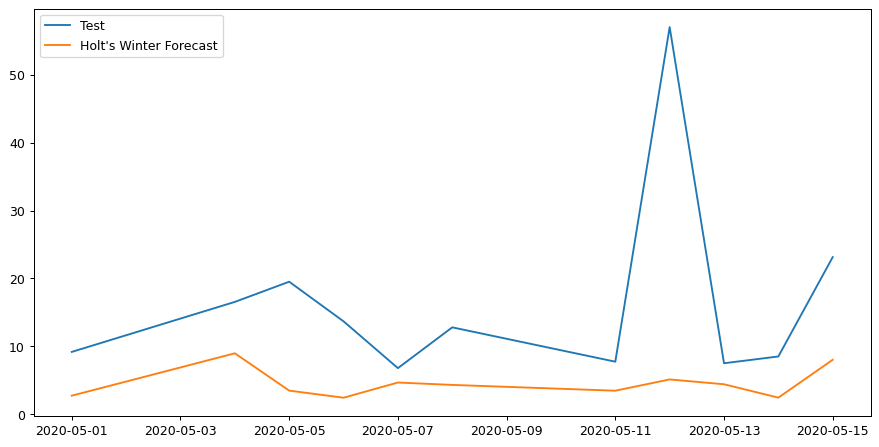

In [157]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit3 = ExponentialSmoothing(np.asarray(train3),seasonal_periods=9, trend="add",seasonal="add").fit()
test3["Holt's winter"] = fit3.forecast(len(test3))

#plotting
test3["Holt's winter"] = np.exp(test3["Holt's winter"])
test3["Quantity"] = np.exp(test3["Quantity"])
plt.figure(figsize=(12,6), dpi=90)
# plt.plot(daily.ffill(), label="Train")
plt.plot(test3["Quantity"], label="Test")
plt.plot(test3["Holt's winter"], label="Holt's Winter Forecast")
plt.legend(loc="upper left")
plt.show()

In [158]:
test3

,Quantity,Holt's winter
Date,,
2020-05-01,9.164634,2.711485
2020-05-04,16.536585,8.958970
2020-05-05,19.511111,3.457510
2020-05-06,13.671642,2.410097
2020-05-07,6.770492,4.650369
2020-05-08,12.784314,4.297632
2020-05-11,7.721910,3.443809
2020-05-12,57.050847,5.104703
2020-05-13,7.492462,4.395288


In [159]:
up2 = files.upload()

Saving prediction.csv to prediction.csv


In [161]:
pred = pd.read_csv("prediction.csv")
pred.head()

,Date,Actual values,Forecast
0,2020-05-01,9.164634,6.180194
1,2020-05-04,16.536585,4.003497
2,2020-05-05,19.511111,8.232752
3,2020-05-06,13.671642,6.118940
4,2020-05-07,6.770492,8.076978


In [170]:
[j for j in test1["SES"]]

[9.11405368246647,
 9.11405368246647,
 9.11405368246647,
 9.11405368246647,
 9.11405368246647,
 9.11405368246647,
 9.11405368246647,
 9.11405368246647,
 9.11405368246647,
 9.11405368246647,
 9.11405368246647]

In [171]:
for i in [test1,test2,test3]:
  pred[i.columns[1]] = [j for j in i[i.columns[1]]]

In [172]:
pred

,Date,Actual values,Forecast,SES,Holt's Linear,Holt's winter
0,2020-05-01,9.164634,6.180194,9.114054,8.752149,2.711485
1,2020-05-04,16.536585,4.003497,9.114054,9.262296,8.958970
2,2020-05-05,19.511111,8.232752,9.114054,9.802179,3.457510
3,2020-05-06,13.671642,6.118940,9.114054,10.373531,2.410097
4,2020-05-07,6.770492,8.076978,9.114054,10.978185,4.650369
5,2020-05-08,12.784314,9.072763,9.114054,11.618084,4.297632
6,2020-05-11,7.721910,9.862080,9.114054,12.295281,3.443809
7,2020-05-12,57.050847,7.385135,9.114054,13.011952,5.104703
8,2020-05-13,7.492462,7.094786,9.114054,13.770395,4.395288
9,2020-05-14,8.490397,7.783495,9.114054,14.573047,2.421780


In [173]:
pred.to_csv("prediction2.csv")
files.download("prediction2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>